## Path Finder: What are the potential paths between two nodes?
## This pipeline can be used to get a ranked path between A and B given a set of paths.

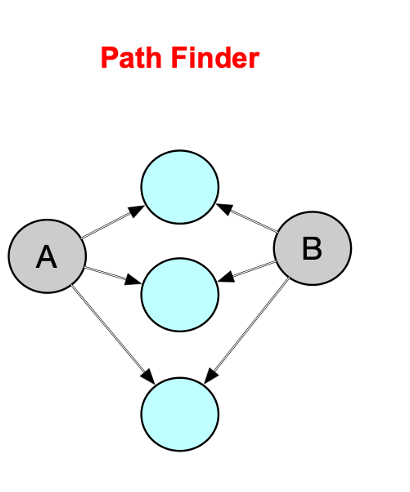

Example questions: 

What drugs may treat ovarian cancer (MONDO:0008170) patients with BRCA1 mutation?  

What is the mechanism of Olaparib being effective for patients with BRCA1 mutation?


In [1]:
# include path ../src in order to import modules
import sys
sys.path.append('../src')
import TCT as TCT
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import ipywidgets as widgets

In [2]:
# Step1: List all the APIs in the translator system
APInames = TCT.list_Translator_APIs()
print(len(APInames))
#print(APInames.keys())

# Step 2: Get metaKG and all predicates from Translator APIs
#metaKG = TCT.get_KP_metadata(APInames) # This only applies to the Translator APIs
#print(metaKG.columns)
#print(metaKG.shape)

#metaKG.to_csv('../metaData/metaKG.csv', index=False)
metaKG = pd.read_csv('../metaData/metaKG.csv')
All_predicates = list(set(metaKG['KG_category']))
All_categories = list((set(list(set(metaKG['Subject']))+list(set(metaKG['Object'])))))

98


In [3]:
#### The following use case is to fine the Genes or proteins that connect the gene BRCA2 and the drug Olaparib


In [4]:
# Step 3: set input parameters

# Node1 for query
input_node1 = 'BRCA2'
input_node1_id = TCT.get_curie(input_node1)
print(input_node1_id)
input_node1_list = [input_node1_id]
input_node1_category = ['biolink:Gene'] # Node: this has to be in a format of biolink:xxx

#Node2 for query
input_node2_list = []
#input_node2_category = ['biolink:Drug','biolink:SmallMolecule'] # Node: this has to be in a format of biolink:xxx
input_node2_category = ['biolink:Gene','biolink:Protein'] # Node: this has to be in a format of biolink:xxx


# Get all predicates for the input node1 and node2, user can furter select the predicates among this list
sele_predicates = list(set(TCT.select_concept(sub_list=input_node1_category,
                                              obj_list=input_node2_category,
                                              metaKG=metaKG)))

print("all relevant predicates in Translator:")
print(sele_predicates)
# select predicates

# Get all APIs for the input node1 and node2, user can furter select the APIs among this list
sele_APIs_1 = TCT.select_API(sub_list=input_node1_category,
                             obj_list=input_node2_category,
                             metaKG=metaKG)
print("all relevant APIs in Translator:")
print(sele_APIs_1)

# get API URLs
API_URLs_1 = TCT.get_Translator_API_URL(sele_APIs_1, APInames)

#---------------------------------------------------------------------------------------------------------------------------------#

# Node3 for query
#input_node3 = 'Ovarian cancer'
input_node3 = "Olaparib"
input_node3_id = TCT.get_curie(input_node3)
print(input_node3_id)
#input_node3_id = "MONDO:0008170" # have to change UMLS to MONDO ids
input_node3_list = [input_node3_id]
input_node3_category = ['biolink:SmallMolecule', 'biolink:Drug','biolink:ChemicalSubstance'] # Node: this has to be in a format of biolink:xxx
#input_node3_category = ['biolink:Disease']

# Get all predicates for the input node1 and node2, user can furter select the predicates among this list
sele_predicates_2 = list(set(TCT.select_concept(sub_list=input_node3_category,
                                                obj_list=input_node2_category,
                                                metaKG=metaKG)))
print("all relevant predicates in Translator:")
print(sele_predicates_2)
# select predicates

# Get all APIs for the input node1 and node2, user can furter select the APIs among this list
sele_APIs_2 = TCT.select_API(sub_list=input_node3_category,
                             obj_list=input_node2_category,
                             metaKG=metaKG)
print("all relevant APIs in Translator:")
print(sele_APIs_2)

# get API URLs
API_URLs_2 = TCT.get_Translator_API_URL(sele_APIs_2, 
                                      APInames)

NCBIGene:675
all relevant predicates in Translator:
['biolink:subclass_of', 'biolink:has_input', 'biolink:directly_physically_interacts_with', 'biolink:interacts_with', 'biolink:causes', 'biolink:derives_into', 'biolink:contributes_to', 'biolink:close_match', 'biolink:produced_by', 'biolink:physically_interacts_with', 'biolink:regulates', 'biolink:gene_product_of', 'biolink:positively_correlated_with', 'biolink:correlated_with', 'biolink:derives_from', 'biolink:genetic_association', 'biolink:orthologous_to', 'biolink:part_of', 'biolink:coexpressed_with', 'biolink:genetically_interacts_with', 'biolink:affects', 'biolink:affected_by', 'biolink:homologous_to', 'biolink:coexists_with', 'biolink:binds', 'biolink:biomarker_for', 'biolink:has_phenotype', 'biolink:regulated_by', 'biolink:negatively_correlated_with', 'biolink:related_to', 'biolink:produces', 'biolink:genetically_associated_with', 'biolink:has_part', 'biolink:has_gene_product']
all relevant APIs in Translator:
['Automat-biolink(

In [5]:
# Step 4: Format query json
query_json = TCT.format_query_json(input_node1_list,  # a list of identifiers for input node1
                                   input_node2_list,  # it can be empty list if only want to query node1
                                   input_node1_category,  # a list of categories of input node1
                                   input_node2_category,  # a list of categories of input node2
                                   sele_predicates) # a list of predicates
# Step 5: Query Translator APIs and parse results
result = TCT.parallel_api_query(API_URLs_1,query_json=query_json, max_workers=len(API_URLs_1))
# Step 6: Parse results
result_parsed = TCT.parse_KG(result)
# Step 7: Ranking the results. This ranking method is based on the number of unique primary infores. It can only be used to rank the results with one defined node.
result_ranked_by_primary_infores = TCT.rank_by_primary_infores(result_parsed, input_node1_id)   # input_node1_id is the curie id of the input node, such as "NCBIGene:672"


'' generated an exception: Invalid URL '': No scheme supplied. Perhaps you meant https://?
'' generated an exception: Invalid URL '': No scheme supplied. Perhaps you meant https://?
'' generated an exception: Invalid URL '': No scheme supplied. Perhaps you meant https://?
'' generated an exception: Invalid URL '': No scheme supplied. Perhaps you meant https://?
'' generated an exception: Invalid URL '': No scheme supplied. Perhaps you meant https://?
'' generated an exception: Invalid URL '': No scheme supplied. Perhaps you meant https://?
Warning Code:404:https://api.bte.ncats.io/v1/bde72db681ec0b8f9eeb67bb6b8dd72c/query
Warning Code:404:https://automat.renci.org/biolink/1.4/queryWarning Code:404:https://ars-prod.transltr.io/ara-robokop/api/runquery

Warning Code:405:https://automat.renci.org/pharos/1.4/queryWarning Code:405:https://automat.renci.org/gtopdb/1.4/query

Warning Code:405:https://automat.renci.org/icees-kg/1.4/query
Warning Code:405:https://automat.renci.org/gwas-catalog/

UniProtKB:P42771-4no preferred name
[Text(0.5, 0, 'RAD51'), Text(2.5, 0, 'FANCD2'), Text(4.5, 0, 'TP53'), Text(6.5, 0, 'BCCIP'), Text(8.5, 0, 'KAT2B'), Text(10.5, 0, 'PARP1'), Text(12.5, 0, 'XRCC3'), Text(14.5, 0, 'BRCA1'), Text(16.5, 0, 'RAD51C'), Text(18.5, 0, 'HMG20B'), Text(20.5, 0, 'BUB1B'), Text(22.5, 0, 'PCNA'), Text(24.5, 0, 'CDC45'), Text(26.5, 0, 'H2AX'), Text(28.5, 0, 'KIF4A')]


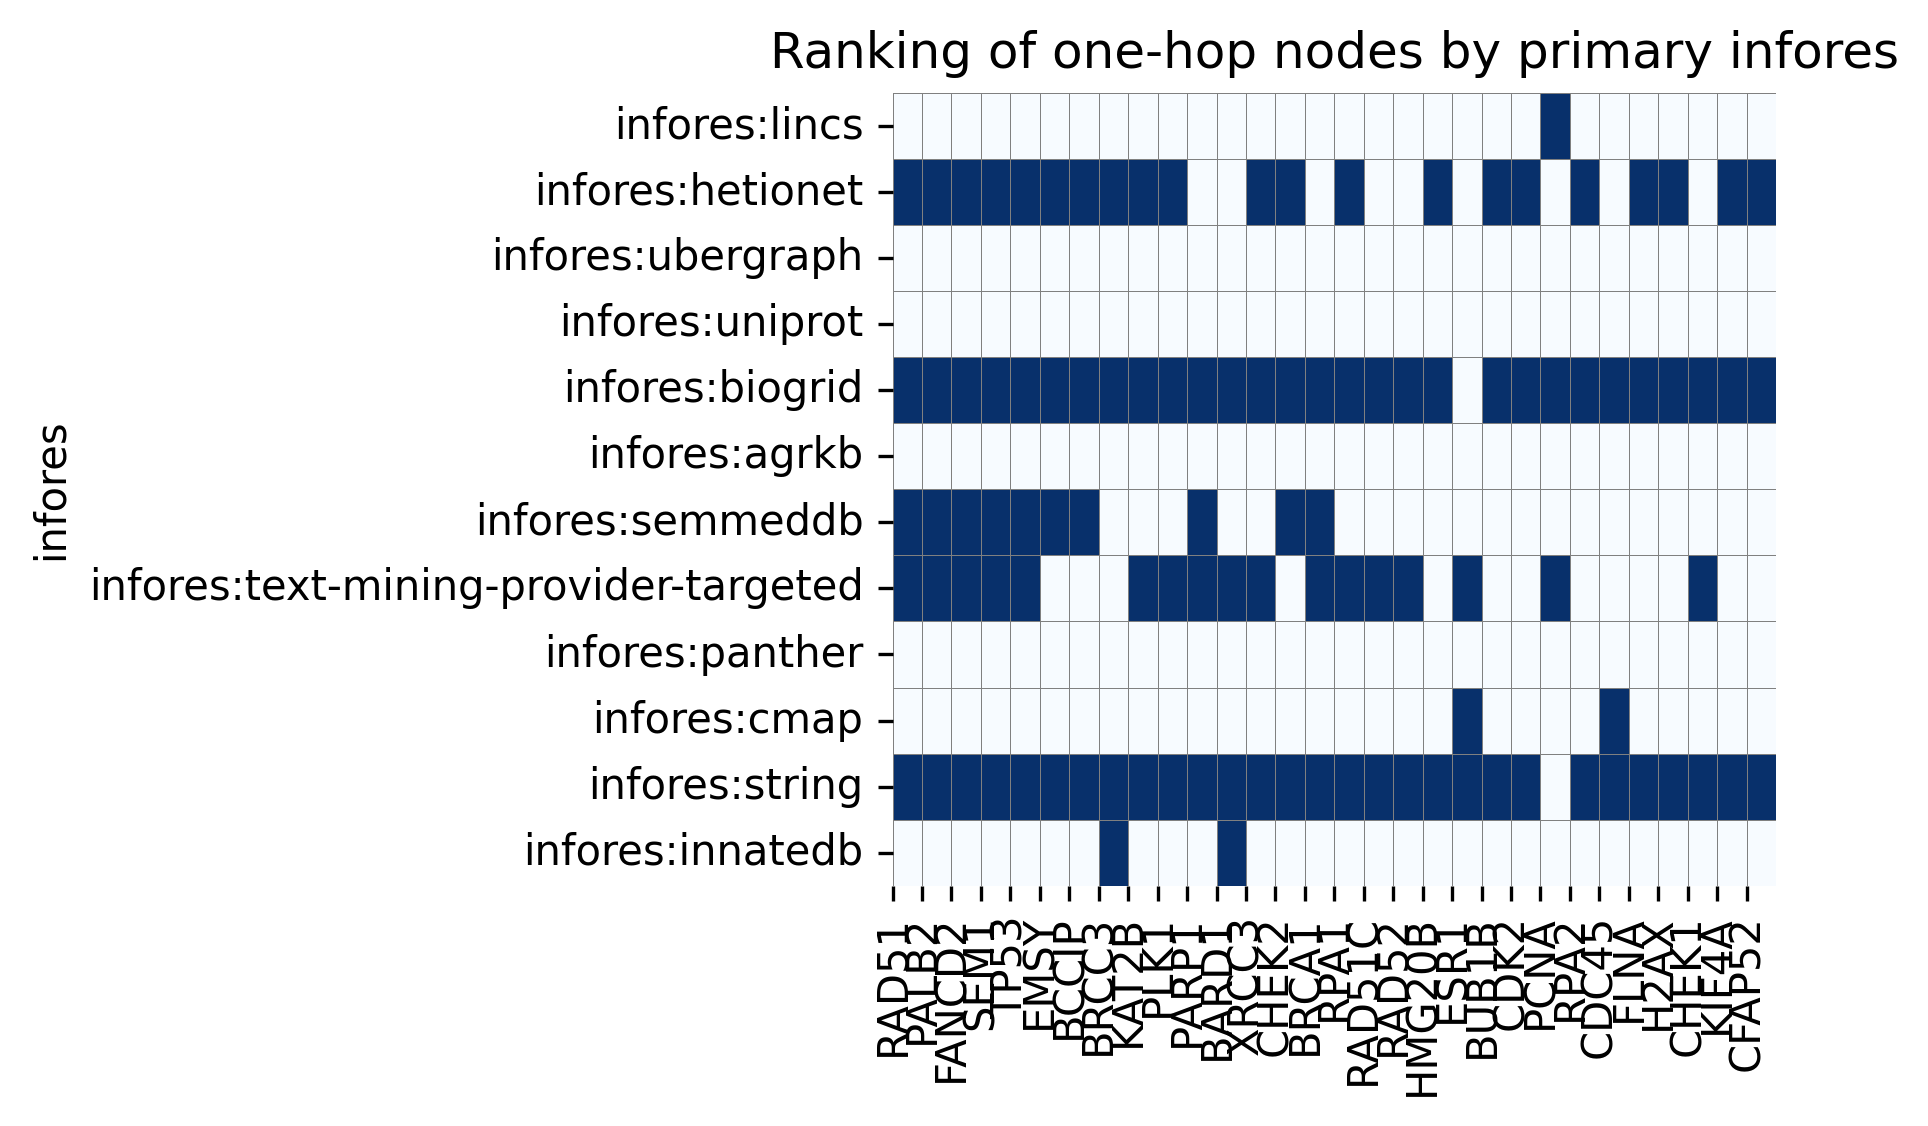

[Text(0.5, 0, 'RAD51'), Text(2.5, 0, 'FANCD2'), Text(4.5, 0, 'TP53'), Text(6.5, 0, 'BCCIP'), Text(8.5, 0, 'KAT2B'), Text(10.5, 0, 'PARP1'), Text(12.5, 0, 'XRCC3'), Text(14.5, 0, 'BRCA1'), Text(16.5, 0, 'RAD51C'), Text(18.5, 0, 'HMG20B'), Text(20.5, 0, 'BUB1B'), Text(22.5, 0, 'PCNA'), Text(24.5, 0, 'CDC45'), Text(26.5, 0, 'H2AX'), Text(28.5, 0, 'KIF4A')]


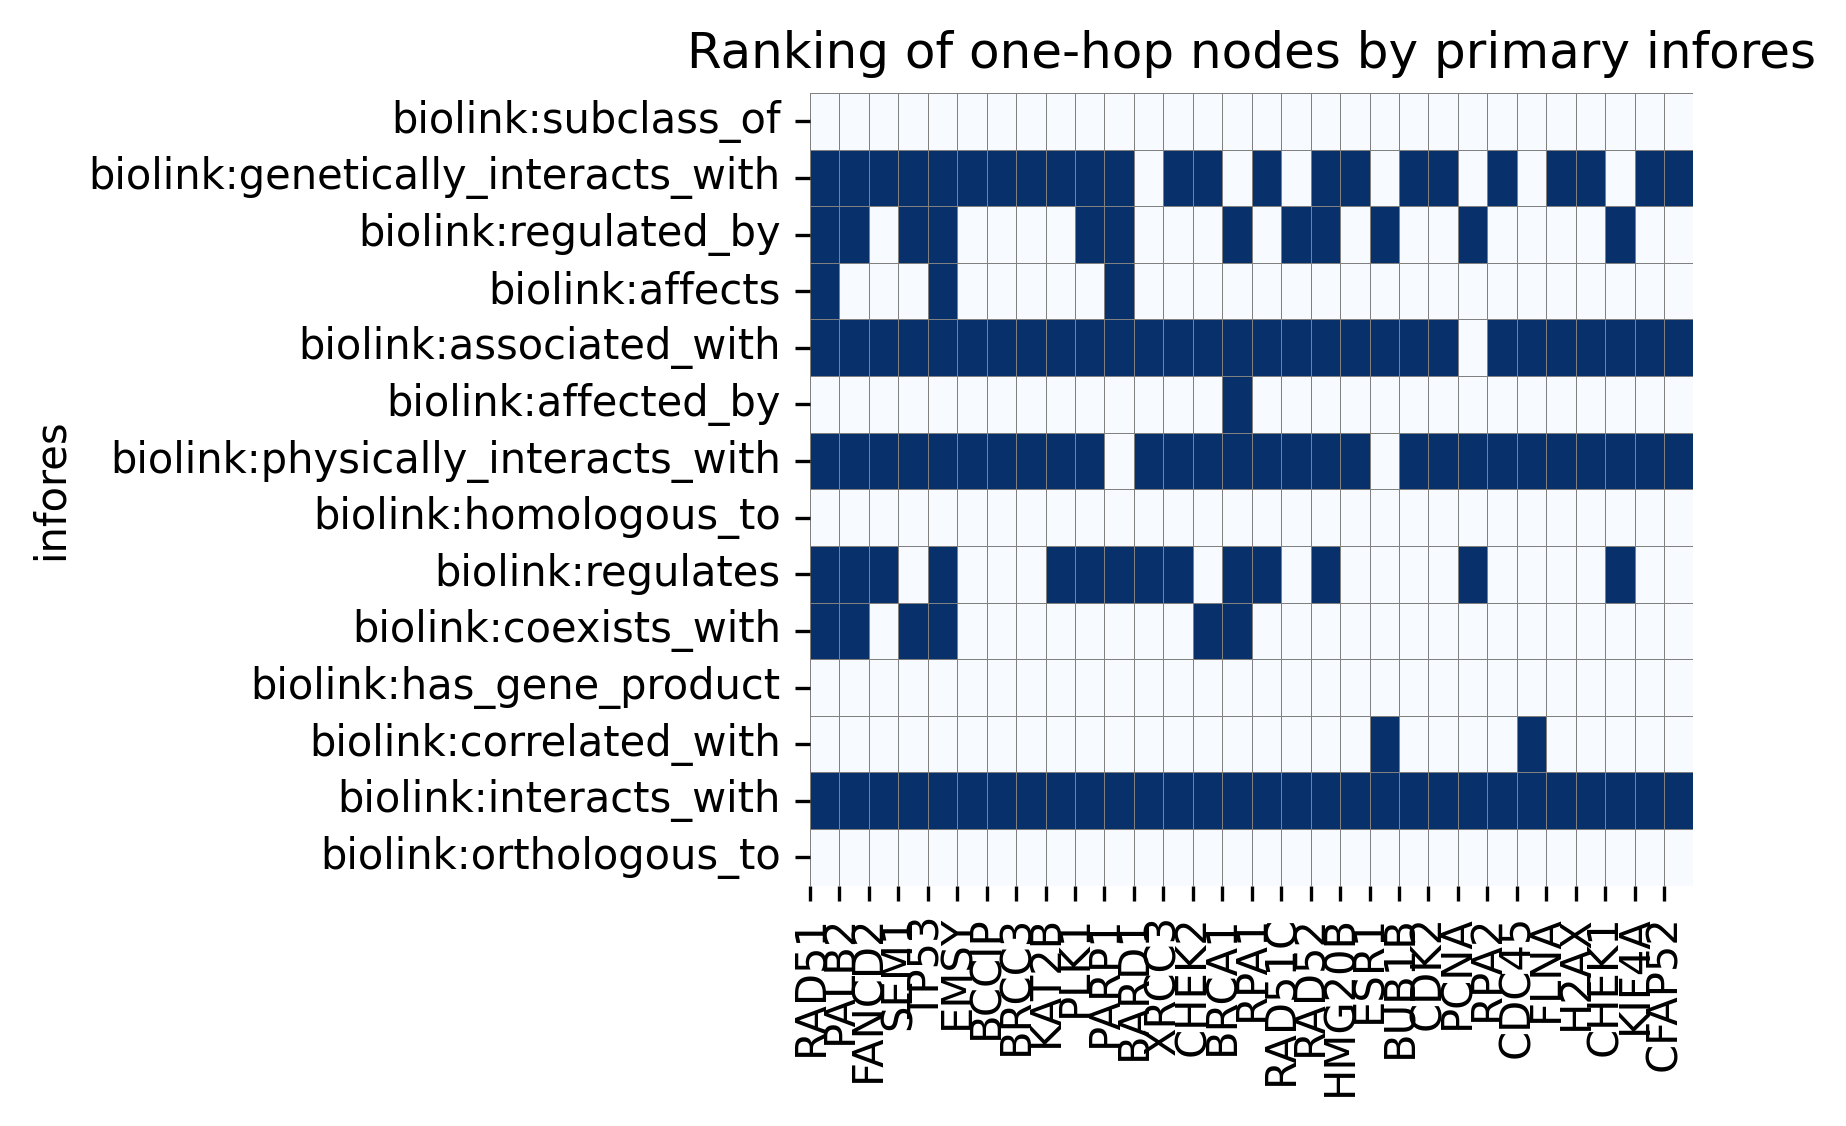

,RAD51,PALB2,FANCD2,SEM1,TP53,EMSY,BCCIP,BRCC3,KAT2B,PLK1,...,PIK3CA,CLTB,AKAP13,TOPBP1,UBE2C,POLQ,IRF9,PGR,CDKN2A,TLE3
biolink:subclass_of,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
biolink:genetically_interacts_with,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
biolink:regulated_by,1,1,0,1,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
biolink:affects,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
biolink:associated_with,1,1,1,1,1,1,1,1,1,1,...,1,0,0,1,1,1,0,1,1,0
biolink:affected_by,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
biolink:physically_interacts_with,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,1,0,0,0,0,0
biolink:homologous_to,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
biolink:regulates,1,1,1,0,1,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
biolink:coexists_with,1,1,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
# Step 8: Visualize the results
TCT.visulization_one_hop_ranking(result_ranked_by_primary_infores, 
                                 result_parsed, 
                                 num_of_nodes = 30, 
                                 input_query = input_node1_id,
                                 fontsize = 10,
                                 title_fontsize=12)

In [7]:
# Step 9: Format query json
query_json2 = TCT.format_query_json(input_node3_list,  # a list of identifiers for input node1
                                   input_node2_list,  # it can be empty list if only want to query node1
                                   input_node3_category,  # a list of categories of input node1
                                   input_node2_category,  # a list of categories of input node2
                                   sele_predicates_2) # a list of predicates


In [8]:
# Step 10: Query Translator APIs and parse results
result2 = TCT.parallel_api_query(API_URLs_2,query_json=query_json2, max_workers=len(API_URLs_2))

# Step 11: Parse results
result_parsed2 = TCT.parse_KG(result2)

# Step 12: Ranking the results. This ranking method is based on the number of unique primary infores. It can only be used to rank the results with one defined node.
result_ranked_by_primary_infores2 = TCT.rank_by_primary_infores(result_parsed2, input_node3_id)   # input_node1_id is the curie id of the input node, such as "NCBIGene:672"


'' generated an exception: Invalid URL '': No scheme supplied. Perhaps you meant https://?
'https://automat.ci.renci.org/drugcentral/1.4/query' generated an exception: HTTPSConnectionPool(host='automat.ci.renci.org', port=443): Max retries exceeded with url: /drugcentral/1.4/query (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x13e3cc670>: Failed to establish a new connection: [Errno 8] nodename nor servname provided, or not known'))
'' generated an exception: Invalid URL '': No scheme supplied. Perhaps you meant https://?
'' generated an exception: Invalid URL '': No scheme supplied. Perhaps you meant https://?
Warning Code:404:https://api.bte.ncats.io/v1/8f08d1446e0bb9c2b323713ce83e2bd3/query
Warning Code:404:https://api.bte.ncats.io/v1/bde72db681ec0b8f9eeb67bb6b8dd72c/query
Warning Code:404:https://automat.renci.org/biolink/1.4/query
Warning Code:404:https://automat.ci.transltr.io/ubergraph-nonredundant/1.4/query
Warning Code:405:https://automat.renci.

UniProtKB:P42166-1no preferred name
UniProtKB:Q9BXH1-2no preferred name
UniProtKB:Q9UGN5-1no preferred name
TTD.TARGET:T17228no preferred name
TTD.TARGET:T83059no preferred name
TTD.TARGET:T34867no preferred name
[Text(0.5, 0, 'PARP1'), Text(2.5, 0, 'PARP3'), Text(4.5, 0, 'TNKS2'), Text(6.5, 0, 'PARP1_HUMAN Poly [ADP-ribose] polymerase 1 (sprot)'), Text(8.5, 0, 'PARP15'), Text(10.5, 0, 'TNKS2_HUMAN Poly [ADP-ribose] polymerase tankyrase-2 (sprot)'), Text(12.5, 0, 'CHEK1'), Text(14.5, 0, 'PARP16'), Text(16.5, 0, 'CHEK2'), Text(18.5, 0, 'PARP12'), Text(20.5, 0, 'CDK12'), Text(22.5, 0, 'TNKS1_HUMAN Poly [ADP-ribose] polymerase tankyrase-1 (sprot)'), Text(24.5, 0, 'AKT1'), Text(26.5, 0, 'BAX'), Text(28.5, 0, 'RAD51')]


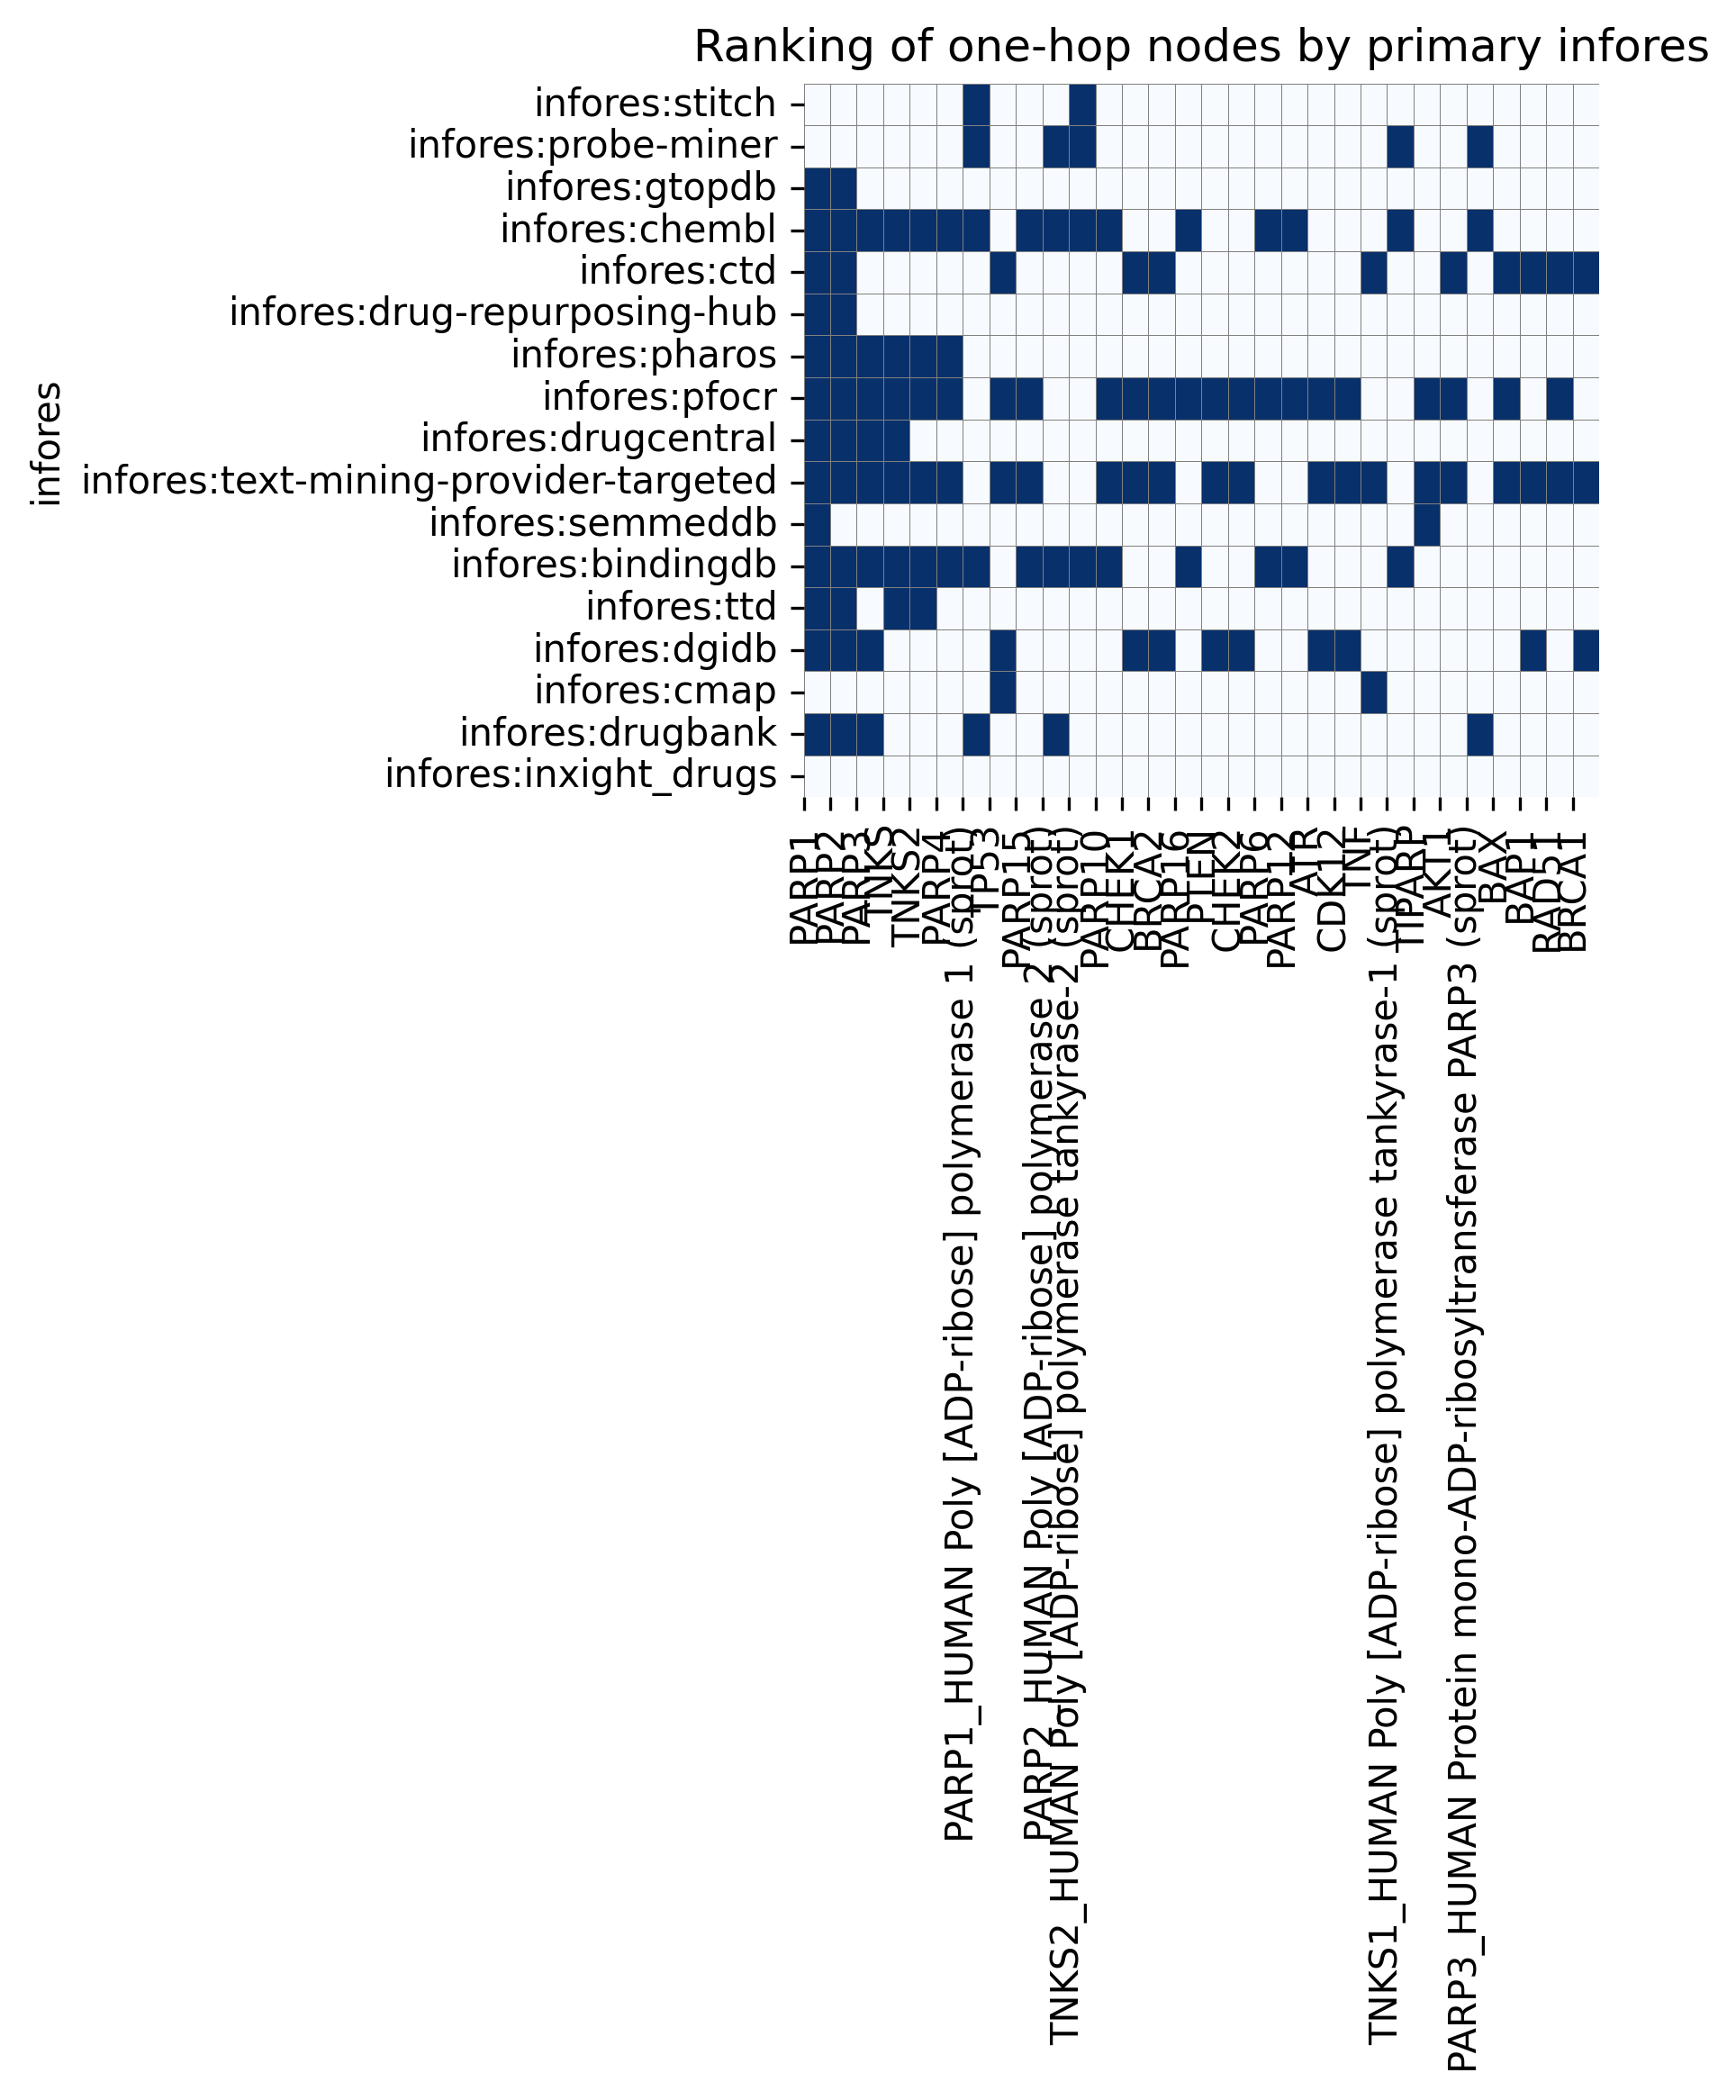

[Text(0.5, 0, 'PARP1'), Text(2.5, 0, 'PARP3'), Text(4.5, 0, 'TNKS2'), Text(6.5, 0, 'PARP1_HUMAN Poly [ADP-ribose] polymerase 1 (sprot)'), Text(8.5, 0, 'PARP15'), Text(10.5, 0, 'TNKS2_HUMAN Poly [ADP-ribose] polymerase tankyrase-2 (sprot)'), Text(12.5, 0, 'CHEK1'), Text(14.5, 0, 'PARP16'), Text(16.5, 0, 'CHEK2'), Text(18.5, 0, 'PARP12'), Text(20.5, 0, 'CDK12'), Text(22.5, 0, 'TNKS1_HUMAN Poly [ADP-ribose] polymerase tankyrase-1 (sprot)'), Text(24.5, 0, 'AKT1'), Text(26.5, 0, 'BAX'), Text(28.5, 0, 'RAD51')]


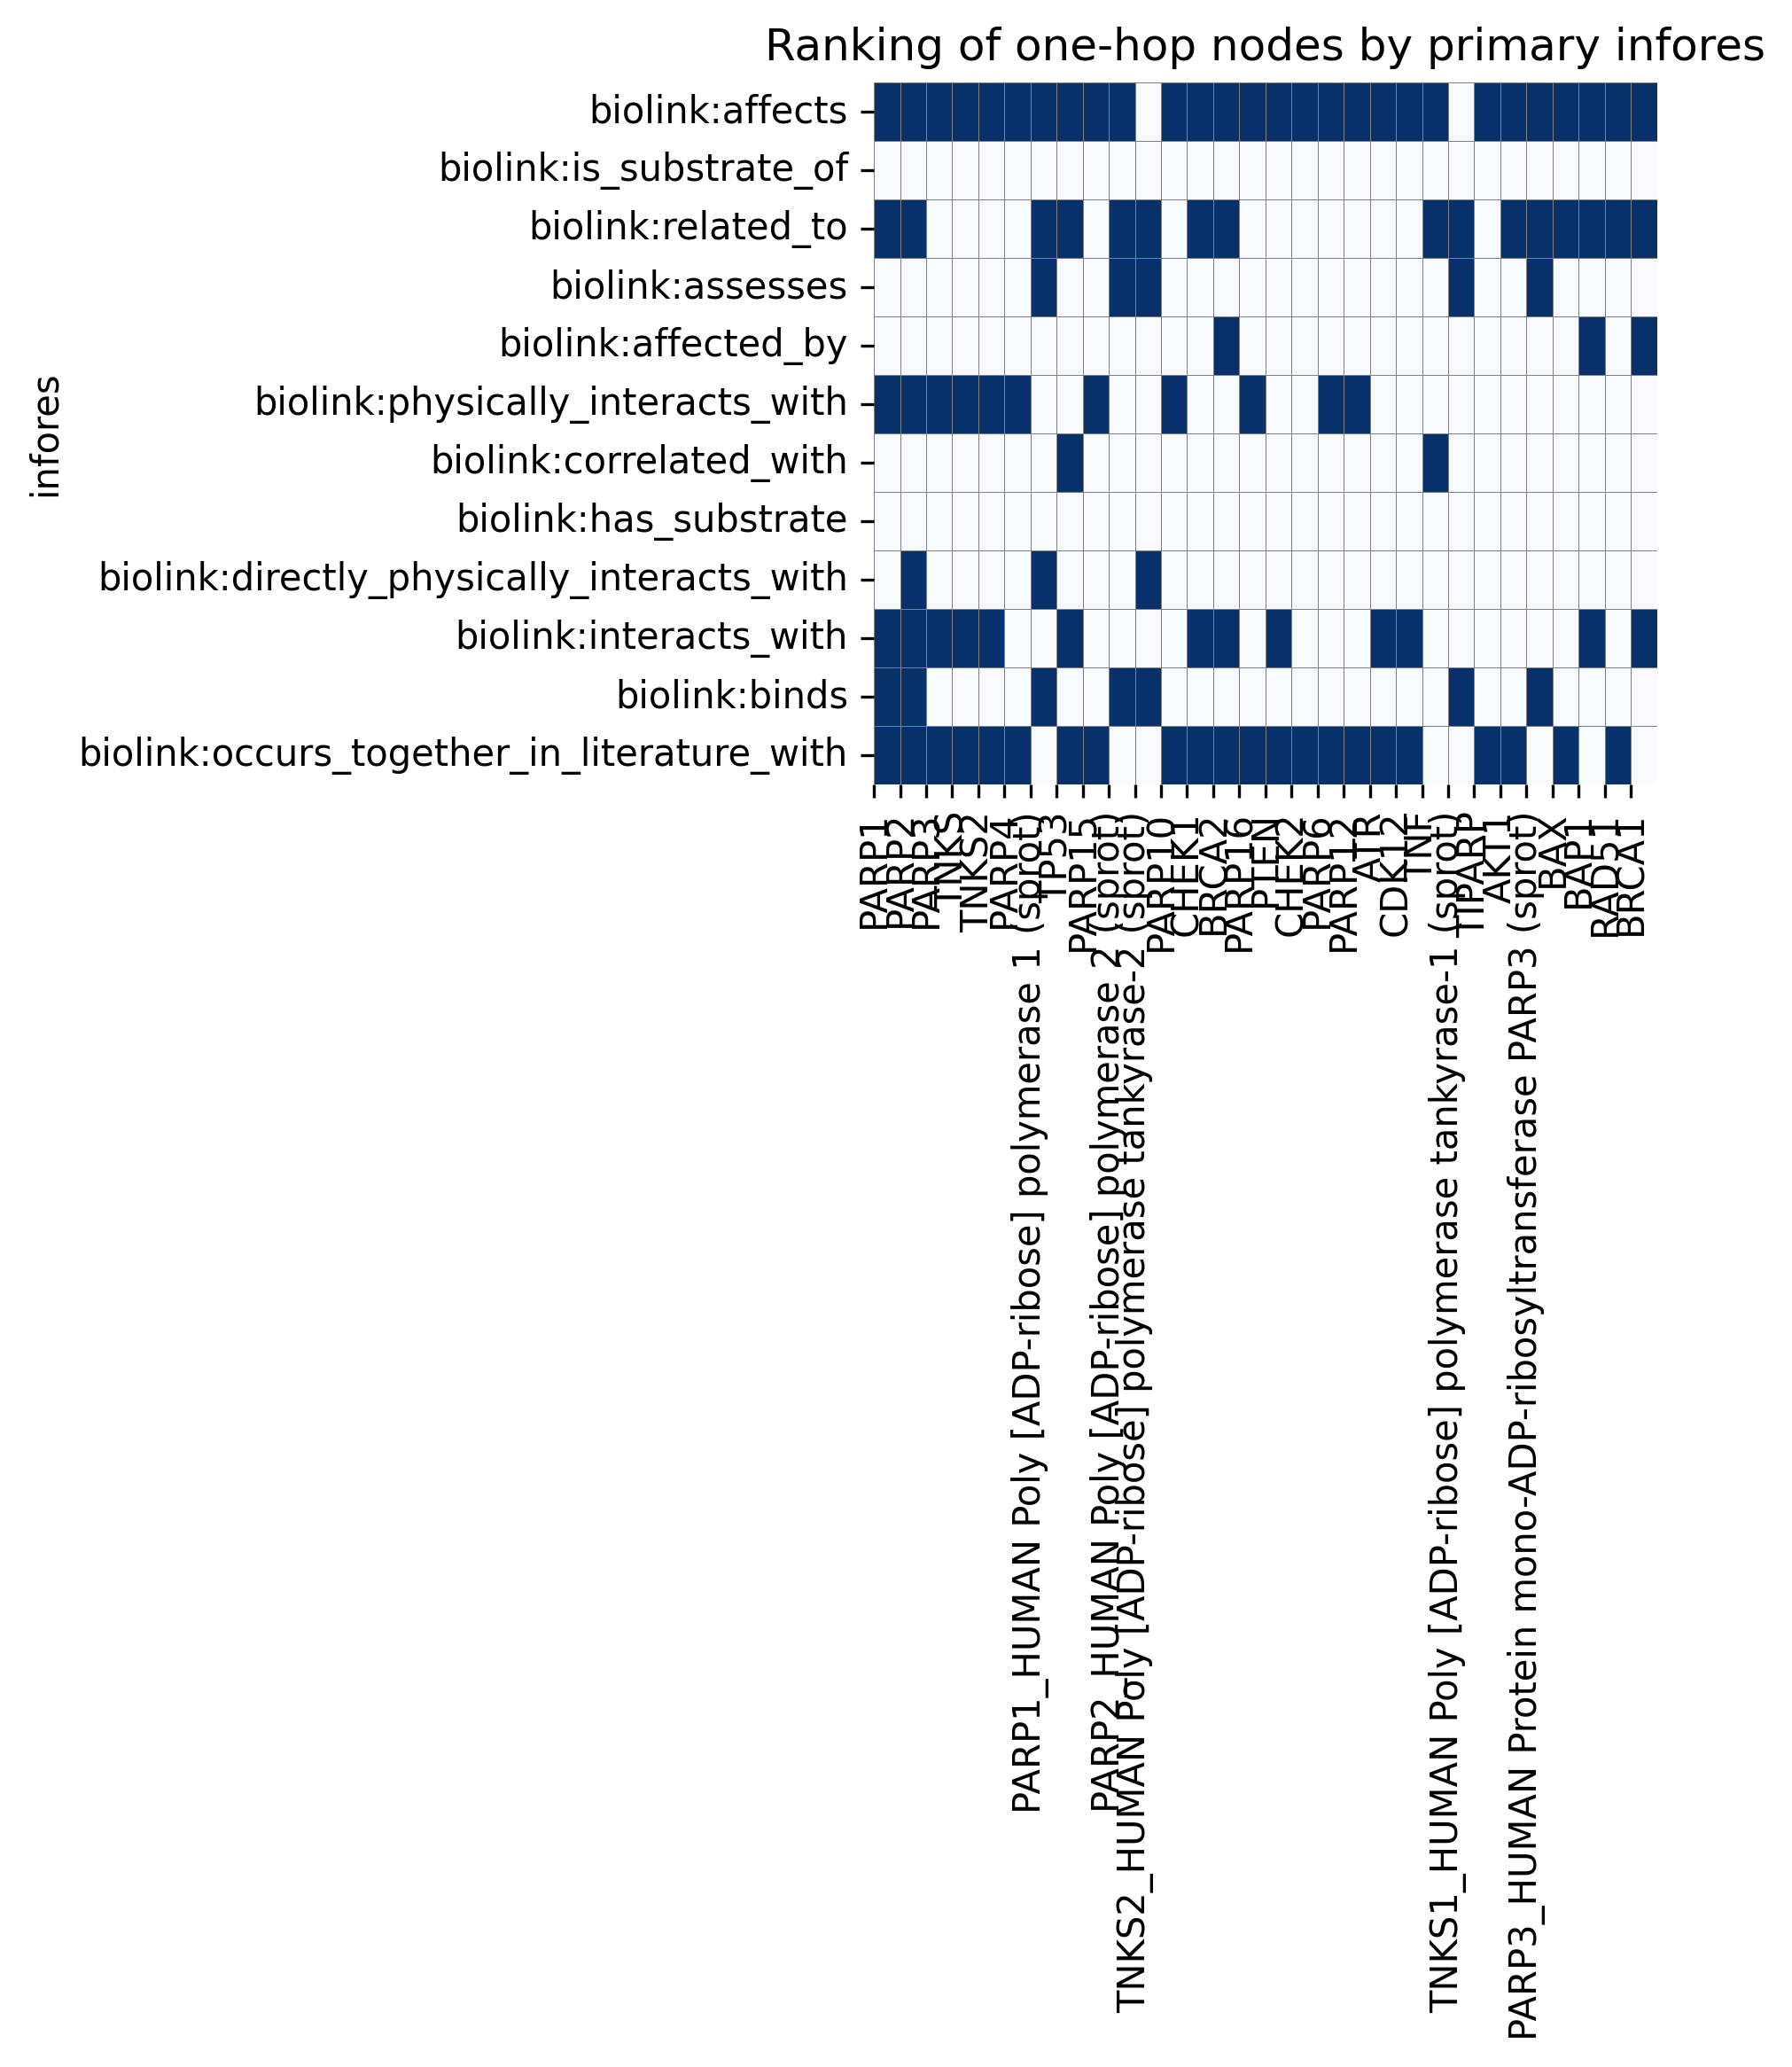

,PARP1,PARP2,PARP3,TNKS,TNKS2,PARP4,PARP1_HUMAN Poly [ADP-ribose] polymerase 1 (sprot),TP53,PARP15,PARP2_HUMAN Poly [ADP-ribose] polymerase 2 (sprot),...,EPHA3,CFD,HADHA,HNF4A,CTSK,LGR4,IDH1,LGALS3,C1S,NHEJ1
biolink:affects,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,1,0,0,0
biolink:is_substrate_of,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
biolink:related_to,1,1,0,0,0,0,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
biolink:assesses,0,0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
biolink:affected_by,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
biolink:physically_interacts_with,1,1,1,1,1,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
biolink:correlated_with,0,0,0,0,0,0,0,1,0,0,...,1,1,1,1,1,1,0,1,1,0
biolink:has_substrate,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
biolink:directly_physically_interacts_with,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
biolink:interacts_with,1,1,1,1,1,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0


In [9]:
# Step 13: Visualize the results
TCT.visulization_one_hop_ranking(result_ranked_by_primary_infores2, result_parsed2, num_of_nodes = 30, 
                                 input_query = input_node3_id,
                                 fontsize = 10,
                                 title_fontsize=12)

In [10]:
# Find possible paths
possible_paths = len(set(result_ranked_by_primary_infores['output_node']).intersection(set(result_ranked_by_primary_infores2['output_node'])))
print("Number of possible paths: ", possible_paths)


Number of possible paths:  128


,score,output_node,predictes1,predictes2,output_node_name
PARP1,0.800000,NCBIGene:142,biolink:genetically_interacts_with\nbiolink:re...,biolink:affects\nbiolink:affects\nbiolink:affe...,PARP1
TP53,0.384615,NCBIGene:7157,biolink:genetically_interacts_with\nbiolink:re...,biolink:affects\nbiolink:correlated_with\nbiol...,TP53
PARP2,0.369231,NCBIGene:10038,biolink:genetically_interacts_with\nbiolink:in...,biolink:affects\nbiolink:directly_physically_i...,PARP2
RAD51,0.230769,NCBIGene:5888,biolink:genetically_interacts_with\nbiolink:re...,biolink:affects\nbiolink:affects\nbiolink:rela...,RAD51
CHEK2,0.184615,NCBIGene:11200,biolink:genetically_interacts_with\nbiolink:as...,biolink:affects\nbiolink:affects\nbiolink:occu...,CHEK2
...,...,...,...,...,...
RPL17,0.015385,NCBIGene:6139,biolink:regulated_by\nbiolink:regulates,biolink:affects,RPL17
XRCC2,0.015385,NCBIGene:7516,biolink:physically_interacts_with\nbiolink:ass...,biolink:affects,XRCC2
COL11A2,0.015385,NCBIGene:1302,biolink:affects,biolink:occurs_together_in_literature_with,COL11A2
MSH3,0.015385,NCBIGene:4437,biolink:interacts_with\nbiolink:associated_with,biolink:affected_by\nbiolink:related_to,MSH3


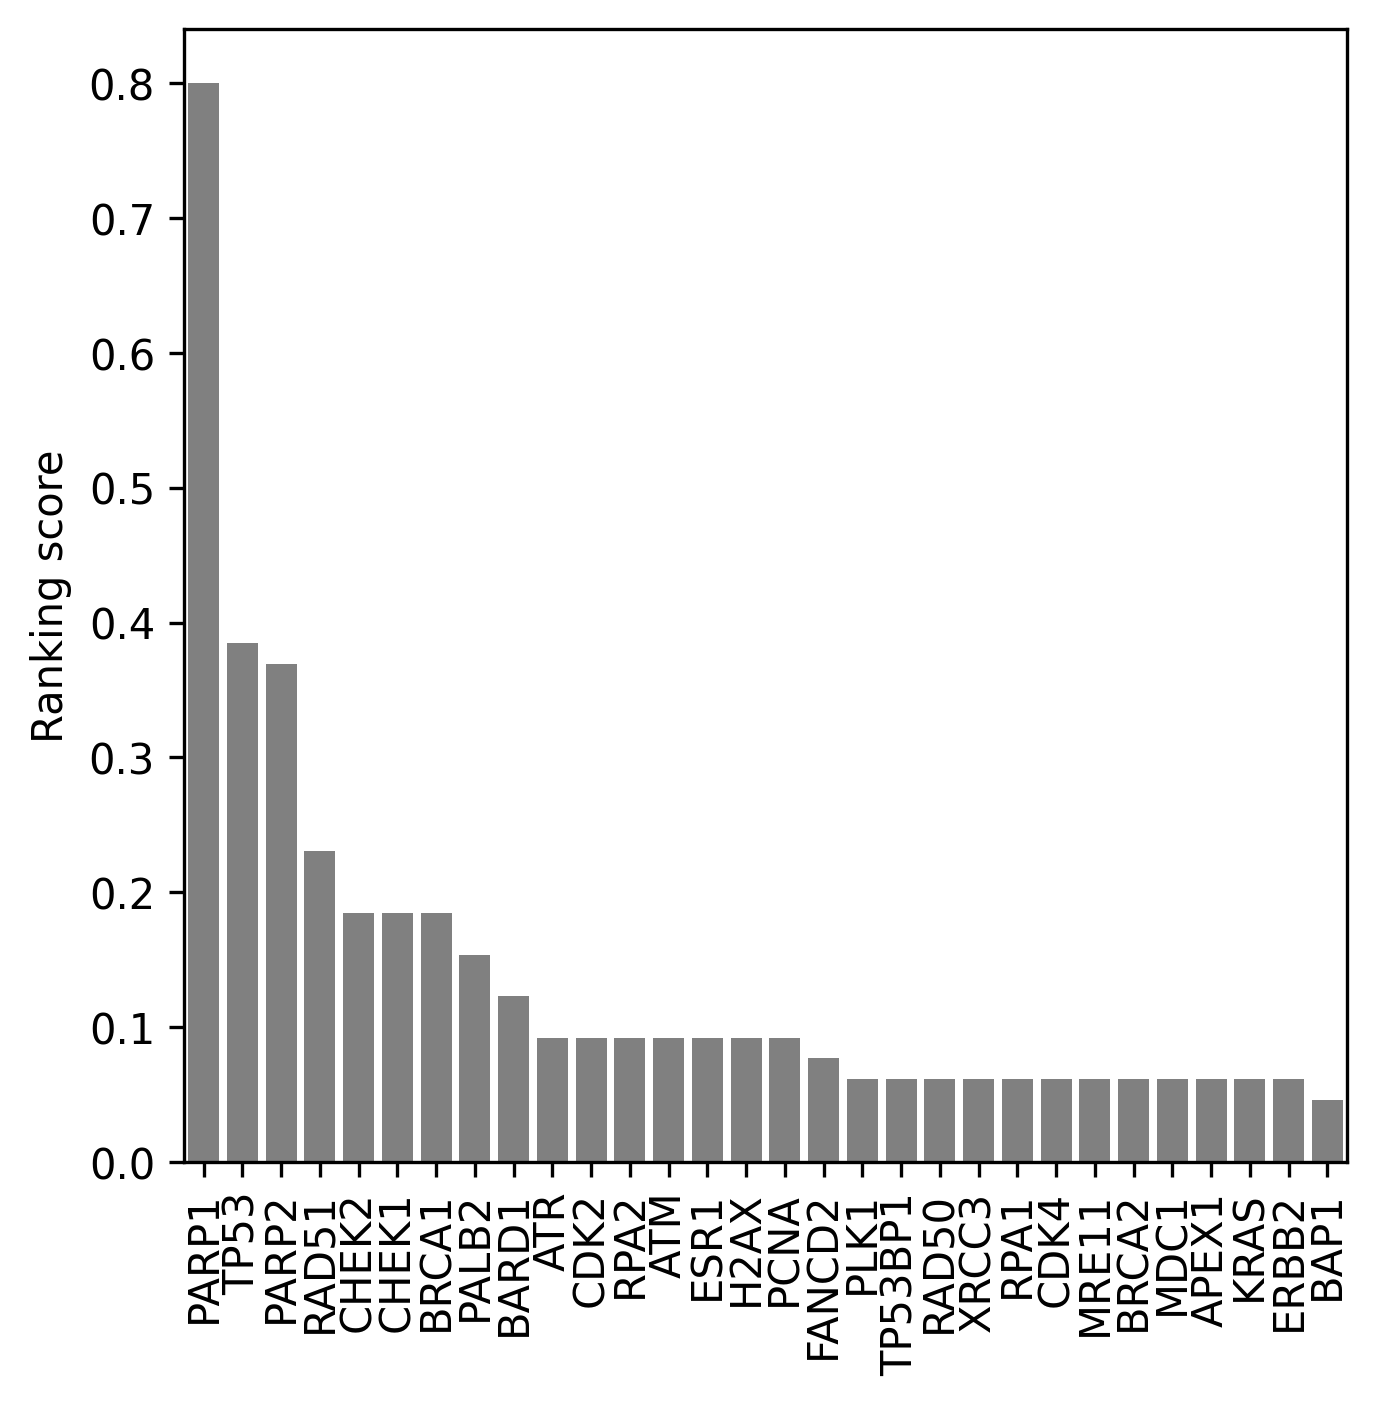

In [11]:
TCT.merge_ranking_by_number_of_infores(result_ranked_by_primary_infores, result_ranked_by_primary_infores2, 
                                       top_n = 30,
                                       fontsize=10,
                                       title_fontsize=12,)

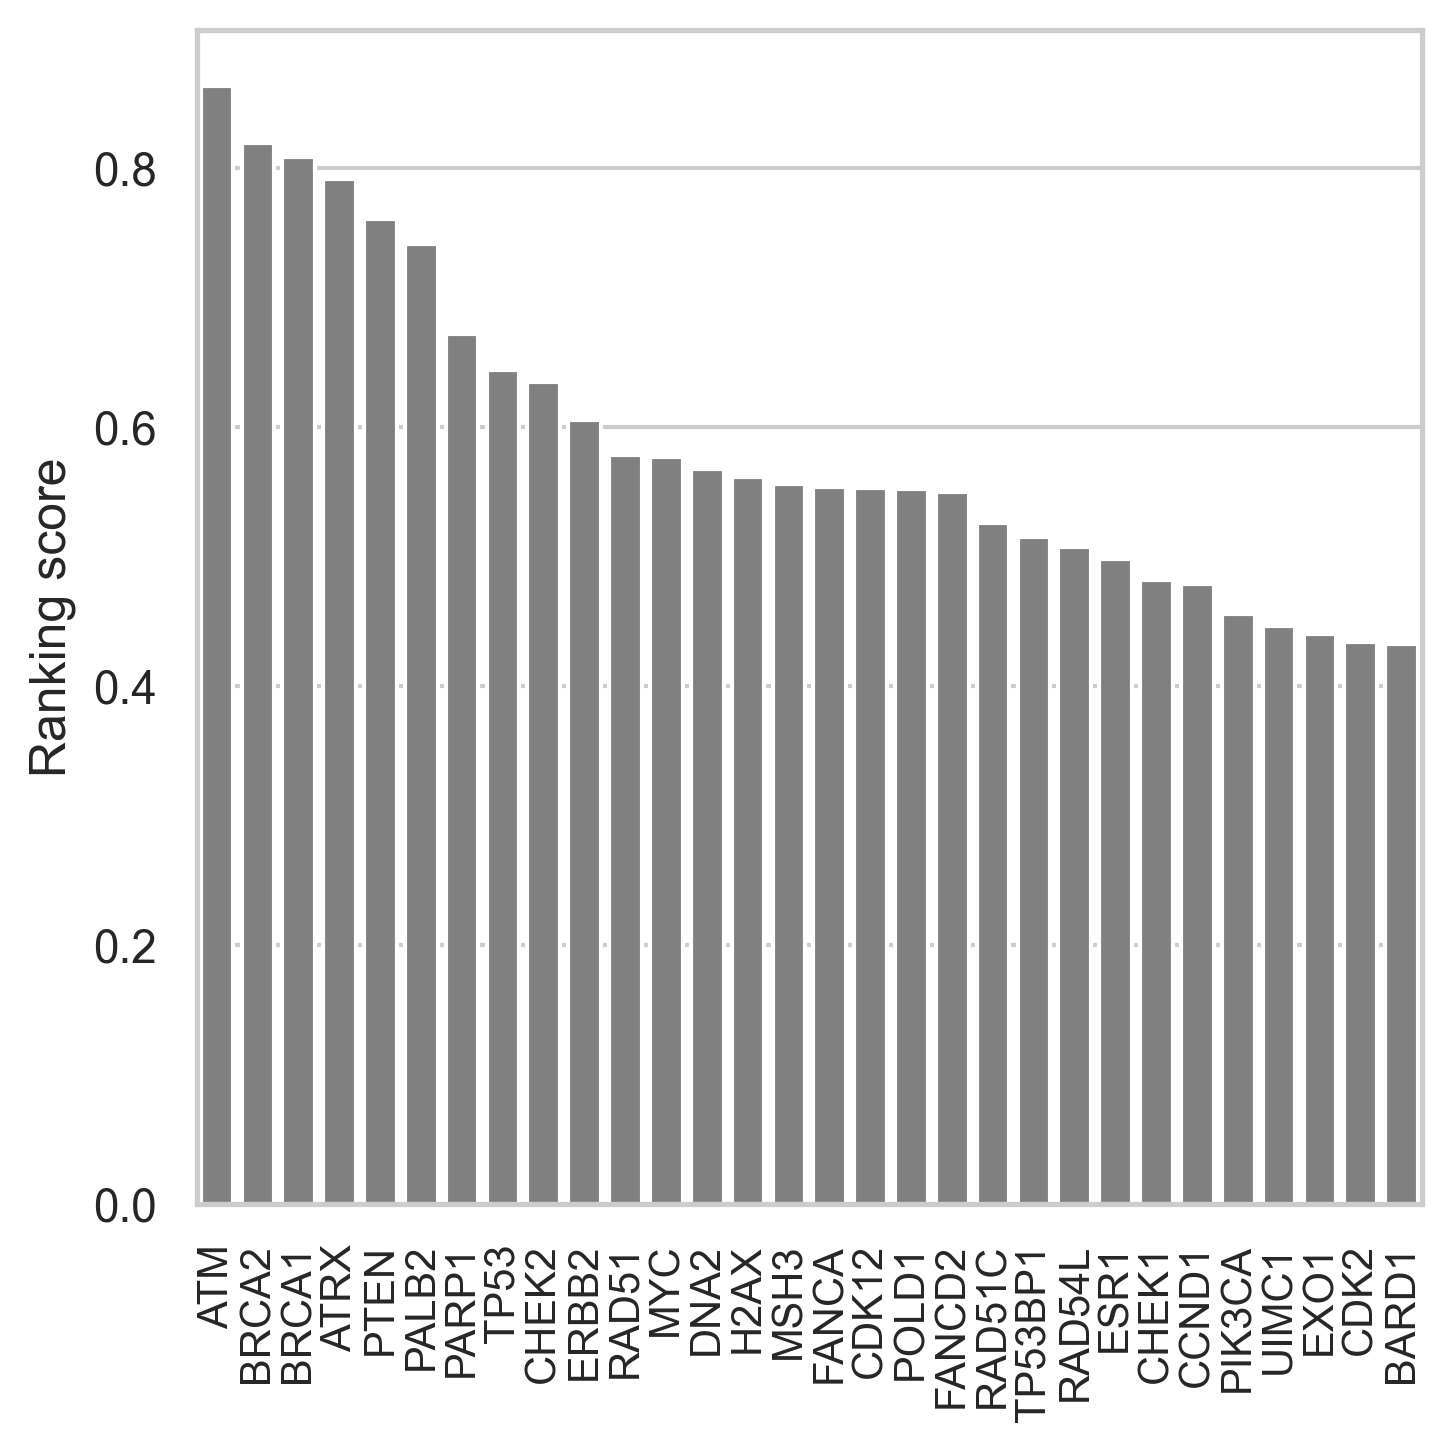

In [12]:
t2 = TCT.merge_by_ranking_index(result_ranked_by_primary_infores,
                           result_ranked_by_primary_infores2, 
                           top_n=30, fontsize=10, 
                           title_fontsize=12)

In [13]:

TCT.visulize_path(input_node1_id, TCT.get_curie("PARP1"), input_node3_id, result, result2)

CytoscapeWidget(cytoscape_layout={'name': 'cola', 'title': 'Path', 'nodeSpacing': 80, 'edgeLengthVal': 50}, cy…

,Subject,Object,Predicates,Subject_name,Object_name
0,NCBIGene:675,NCBIGene:142,affects::infores:semmeddb,BRCA2,PARP1
1,NCBIGene:675,NCBIGene:142,associated_with::infores:string,BRCA2,PARP1
2,NCBIGene:675,NCBIGene:142,regulates::infores:text-mining-provider-targeted,BRCA2,PARP1
4,NCBIGene:675,NCBIGene:142,regulated_by::infores:text-mining-provider-tar...,BRCA2,PARP1
7,NCBIGene:675,NCBIGene:142,genetically_interacts_with::infores:biogrid,BRCA2,PARP1
8,NCBIGene:675,NCBIGene:142,interacts_with::infores:biogrid,BRCA2,PARP1
9,NCBIGene:675,NCBIGene:142,interacts_with::infores:string,BRCA2,PARP1
10,PUBCHEM.COMPOUND:23725625,NCBIGene:142,affects::infores:ctd,Olaparib,PARP1
11,PUBCHEM.COMPOUND:23725625,NCBIGene:142,affects::infores:gtopdb,Olaparib,PARP1
12,PUBCHEM.COMPOUND:23725625,NCBIGene:142,affects::infores:chembl,Olaparib,PARP1
